Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ASUS\AppData\Local\Temp\jieba.cache
Loading model cost 0.947 seconds.
Prefix dict has been built successfully.


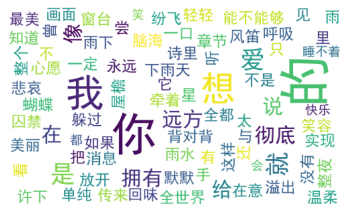

In [1]:
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud

text = open(r'jay.txt', "r",encoding='utf-8').read()

# 2.结巴中文分词，生成字符串，默认精确模式，如果不通过分词，无法直接生成正确的中文词云
cut_text = jieba.cut(text)
result = " ".join(cut_text)

# 3.生成词云图，这里需要注意的是WordCloud默认不支持中文，所以这里需已下载好的中文字库
# 无自定义背景图：需要指定生成词云图的像素大小，默认背景颜色为黑色,统一文字颜色：mode='RGBA'和colormap='pink'
wc = WordCloud(
    # 设置字体，不指定就会出现乱码
    font_path=r'.\simhei.ttf',
    # 设置背景色
    background_color='white',
    # 设置背景宽
    width=500,
    # 设置背景高
    height=300,
    # 最大字体
    max_font_size=80,
    # 最小字体
    min_font_size=10,
)# max_words=1000 ),mode='RGBA',colormap='pink')
# 产生词云
wc.generate(result)
# 保存图片
wc.to_file(r"wordcloud.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 4.显示图片
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()

In [2]:
from pyecharts import WordCloud
import pandas as pd
post_data = pd.read_csv('post_data.csv')
wordcloud = WordCloud(width=1000,height=470)
post_data2 = post_data.groupby(by=['category']).agg({'views':sum}).reset_index()
wordcloud.add("",post_data2['category'],post_data2['views'],word_size_range=[20,100])
wordcloud.render()

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [3]:
from pyecharts import Graph
import json
import os
with open(os.path.join("weibo.json"),"r",encoding="utf-8") as f:
    j = json.load(f)
    nodes,links,categories,cont,mid,userl = j
graph = Graph("微博转发朋友圈",width=1200,height=600)
graph.add("",nodes,links,categories,label_pos="right",graph_repulsion=50,is_legend_show=False,line_curve=0.2,label_text_color=None,)
graph.render()